In [438]:
from skimage.filters import butterworth
from skimage.filters import median

import skimage
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import cv2

from tifffile import imwrite
import imageio
import pyexr

ch = pd.read_csv("GPR_elev_drone2.txt", delim_whitespace=True,
          header=None, names=["Elev","Index"])
tr = pd.read_csv("trace.txt", delim_whitespace=True,
          header=None, names=["GPR_points"])

N = 110
max = 0

size = np.zeros(shape=(N), dtype=int)
size2 = np.zeros(shape=(N), dtype=int)

for i in np.arange(1,N+1,1):
    tm = ch.loc[ch["Index"]==i,["Elev"]]
    size[i-1] = np.size(tm)
   
max = np.max(size)
    
print("max number of GNSS points",max)

for i in np.arange(1,N+1,1):
    size2[i-1] = tr["GPR_points"][i-1]
#    print(size2[i-1])
min = np.min(size2)
print("min number of GPR points",min)

#The shape of final output
Elev_ch4 = np.zeros(shape=(N,min))
Elev_ch5 = np.zeros(shape=(N,min))

max number of GNSS points 1525
min number of GPR points 1498


1498 1525


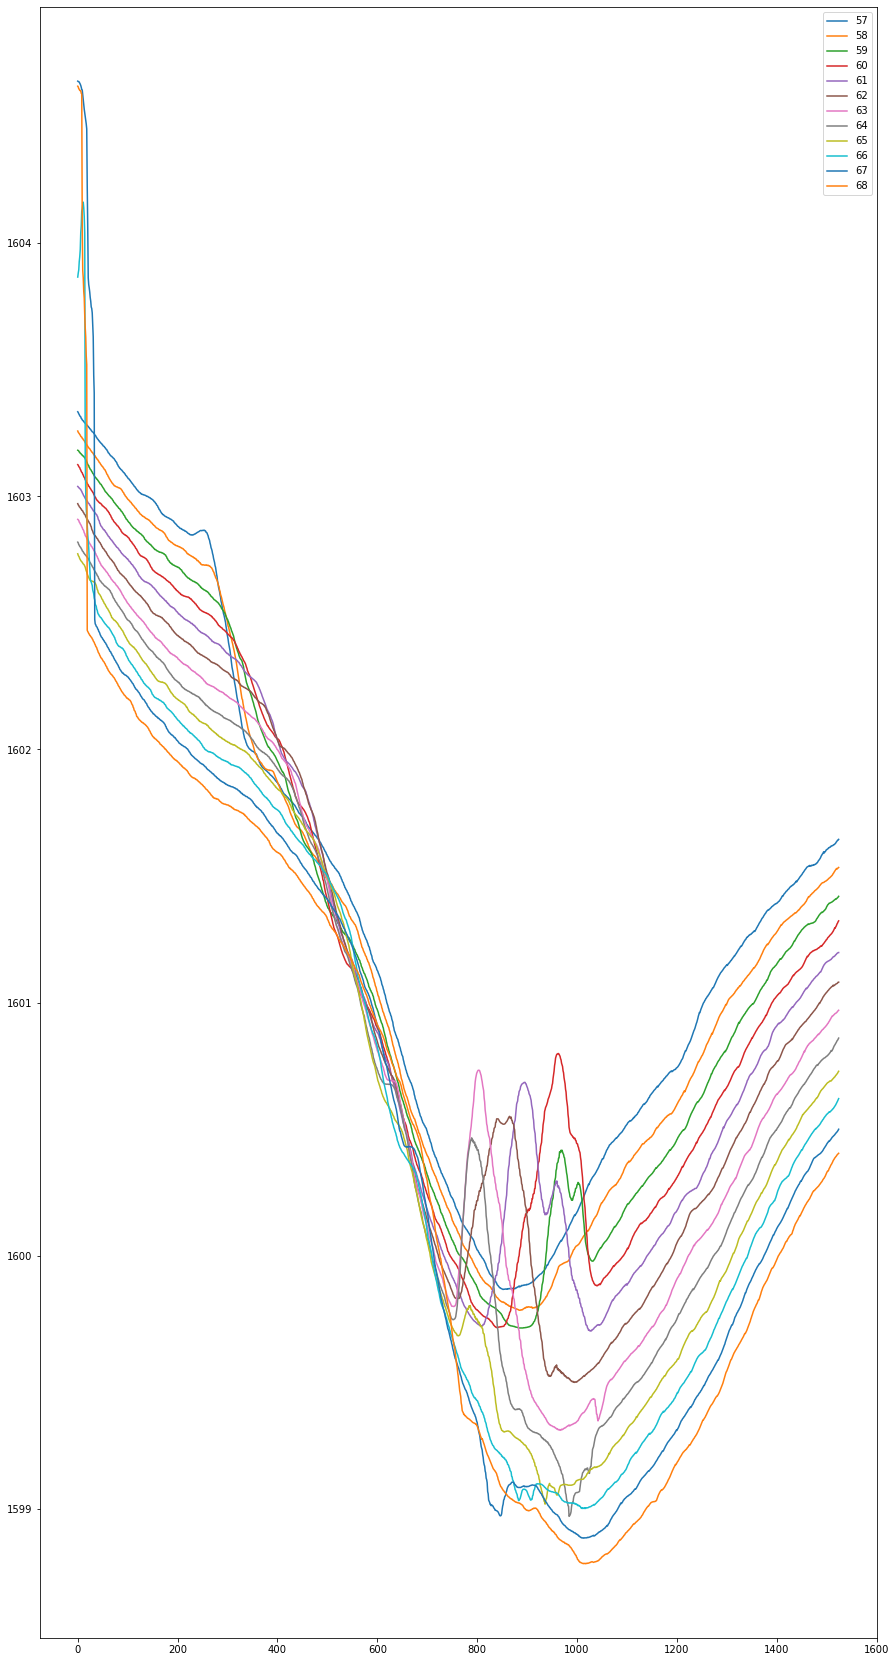

In [439]:
GNSS_drone = np.zeros(shape=(N,max))
GNSS_corr = np.zeros(shape=(N,max)) 

#GNSS_corr2 = np.zeros(shape=(N,max))

for n in np.arange(0,N,1):
    #print("++++++")
    #print("n=",n)
    #print("++++++")

    tm = ch.loc[ch["Index"]==n,["Elev"]]
    
    tm_size = np.size(tm)
    
    for j in np.arange(0,tm_size,1):
        GNSS_drone[n][j] = tm["Elev"][j+sum(size[:(n)])]

print(min, tm_size)
        
f2=open("3Dmorph_GPR_drone.txt","w")
#np.savetxt(f2, GNSS_drone[:][0:min].T, "%12.6f")
np.savetxt(f2, np.flipud(np.transpose(GNSS_drone)), "%12.6f")


#trech piles 
s = 57 
e = 69

#van position 
#s = 66 
#s = 68 
for t in np.arange(s,e,1): 
    plt.plot(GNSS_drone[t][:]) 
    plt.legend(np.arange(s,e,1))


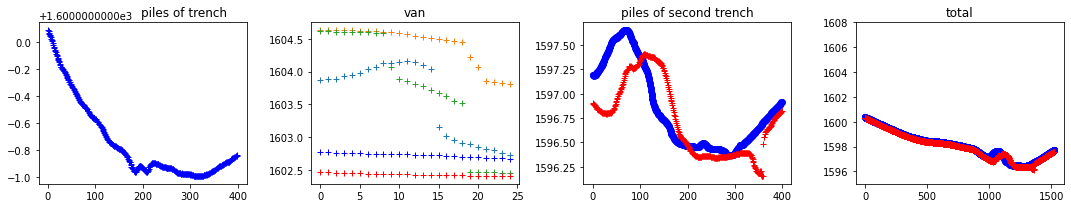

In [440]:
plt.rcParams["figure.figsize"] = (15,3)

plt.subplot(1,4,1)
plt.plot(GNSS_drone[66][700:1100],"b+")
#plt.title("piles of trench", position=(-1,-0.5))
plt.title("piles of trench", position=(0.7,0))

plt.subplot(1,4,2)
plt.plot(GNSS_drone[65][0:25],"b+")
plt.plot(GNSS_drone[66][0:25],"+")
plt.plot(GNSS_drone[67][0:25],"+")
plt.plot(GNSS_drone[68][0:25],"+")
plt.plot(GNSS_drone[69][0:25],"r+")

plt.title("van", position=(0.5,3))

plt.subplot(1,4,3)
plt.plot(GNSS_drone[100][1000:1400],"bo")
plt.plot(GNSS_drone[101][1000:1400],"r+")
plt.title("piles of second trench")


plt.subplot(1,4,4)
plt.plot(GNSS_drone[100][:],"bo")
plt.plot(GNSS_drone[101][:],"r+")
plt.title("total")

plt.ylim(1595,1608)

plt.tight_layout()

#print(GNSS_drone[69][0:25])

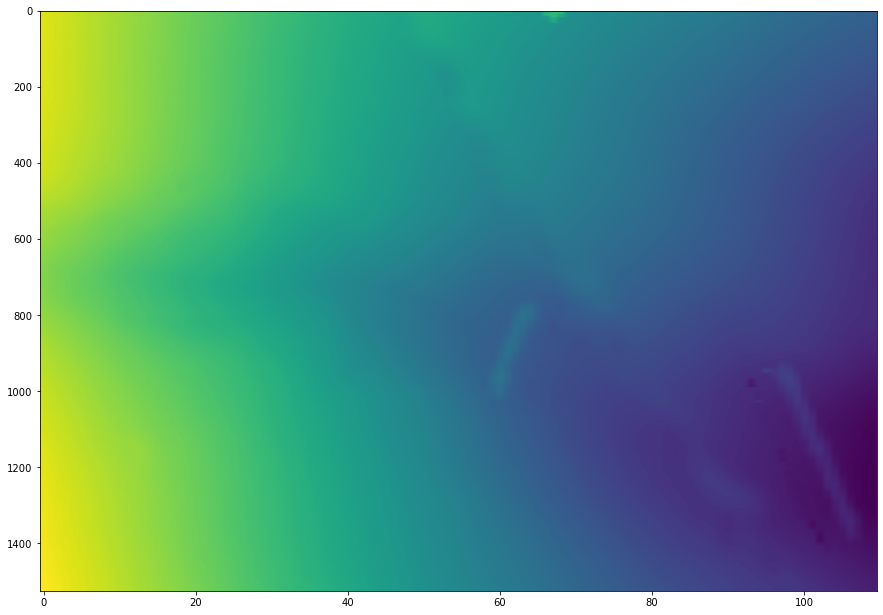

In [411]:
plt.rcParams["figure.figsize"] = (15,30)

plt.imshow(np.transpose(GNSS_drone), aspect=0.05)

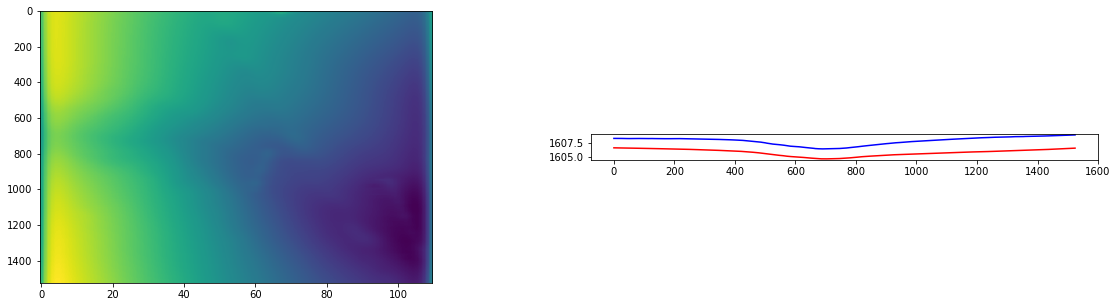

In [441]:
#butterworth filter
#https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.butterworth

#high = skimage.filters.butterworth(GNSS_drone, 0.09, False) 

#chanel_axis = 1 or 1
#In this aixs, data filterd are ditorted in the edge of the line.
high = skimage.filters.butterworth(GNSS_drone, cutoff_frequency_ratio=1*10**(-1), #small but not effective
                                   high_pass=False, 
                                       order=1.3,             #small to remove edge noise
                                   channel_axis=-1) 
#1.36, -1

#channel_axis = 0
#In this axis, data filtered are disorted in the edge of the track.
#high = skimage.filters.butterworth(GNSS_drone, cutoff_frequency_ratio=1*10**(-2.1), #small but not effective
#                                   high_pass=False, 
#                                   order=1.35,             #small to remove edge noise
#                                   channel_axis=0) 


plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1,2,1)
plt.imshow(high.T, aspect=0.05)

plt.subplot(1,2,2, aspect=110.0/(6.0))
#plt.subplot(1,2,2, aspect=110.0/(6.0/10))
plt.rcParams["figure.figsize"] = (10,5)

nn =1
plt.plot(GNSS_drone[nn][:],"b")
plt.plot(high[nn][:],"r-")

#for nn in np.arange(90,108,1):
#    plt.plot(high[nn][:])


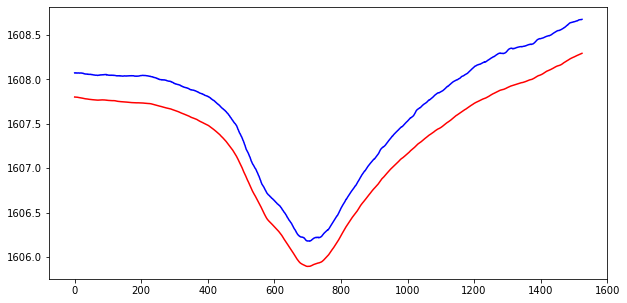

In [442]:
nn = 3

#plt.plot(GNSS_drone[nn][:],"b")
#plt.axes().set_aspect(110.0/6.0)

plt.plot(GNSS_drone[nn][:],"b")

#plt.plot(high3[n][:],"g+")
plt.plot(high[nn][:],"r-")


1608.294260590383
1608.5942605903829
class:  ndarray
shape:  (110, 1525)
strides:  (12200, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x55616e096f90
byteorder:  little
byteswap:  False
type: float64
None


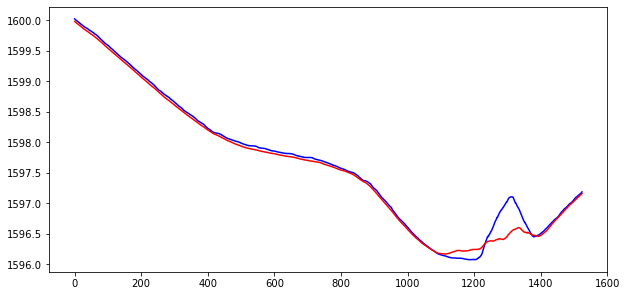

In [443]:
for n in np.arange(0,N,1):
    for j in np.arange(0,max,1):
            high2[n][j] = high[n][j]
#high2 = high

high2[3][:] = high[3][:]+0.3
high2[105][:] = high[105][:]-0.1

nn = 105

plt.axes().set_aspect( 10.0 * 110.0/6.0 )
plt.plot(GNSS_drone[nn][:],"b",)                
plt.plot(high2[nn][:],"r-")


print(high[3][-1])
print(high2[3][-1])
print(np.info(high2))

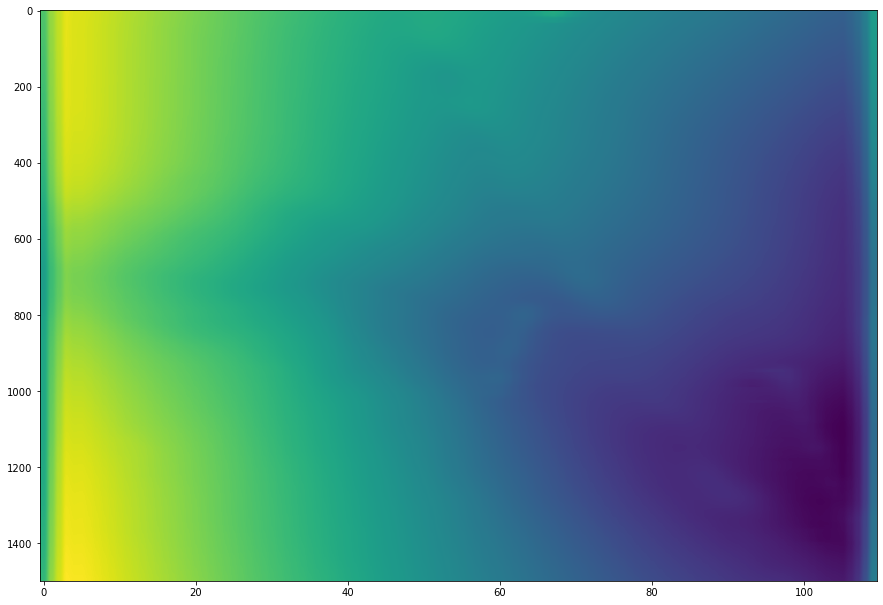

In [475]:
#f1=open("3Dmorph_GPR_filterd2.txt",'a')
f3=open("3Dmorph_GPR_filtered.txt",'w')

#np.savetxt(f3, np.transpose(high2), "%12.6f")
#np.savetxt(f3, np.transpose(np.flipud(high2)), "%12.6f")
#np.savetxt(f3, np.flipud(high2), "%12.6f")


np.savetxt(f3, np.flipud(np.transpose(high2[:,0:min+1])), "%12.6f")
#np.savetxt(f3, high2[:,0:min], "%12.6f")


plt.rcParams["figure.figsize"] = (15,30)
plt.imshow(high2[:,0:min+1].T, aspect=0.05)
#np.savetxt(f1,high2.T,"%9.3f", newline="\n")